# Inferencing

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [7]:
from vanna.remote import VannaDefault

/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Connecting to Database

In [2]:
import psycopg2
import os
from dotenv import load_dotenv


load_dotenv()

dbname = os.environ['DATABASE_NAME']
user = os.environ['USER_NAME']
password = os.environ['PASSWORD']
host = os.environ['HOSTNAME']
port = os.environ['PORT']

try:
    connection = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
    print("Connected to database.")
except psycopg2.Error as e:
    print("Error connecting to database:", e)

Connected to database.


In [3]:
tables = pd.read_sql(
"""
SELECT *
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' 
AND TABLE_SCHEMA = 'public'

""", connection)

tables

/var/folders/l9/9hv3krfn1nlf62cjj00_kzj00000gn/T/ipykernel_58219/817212331.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql(


,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,data-copilot,public,colleague_data,BASE TABLE,None,None,None,None,None,YES,NO,None
1,data-copilot,public,asset_data,BASE TABLE,None,None,None,None,None,YES,NO,None
2,data-copilot,public,office_login_data,BASE TABLE,None,None,None,None,None,YES,NO,None


In [4]:
colleague_data = pd.read_sql_query("SELECT * FROM colleague_data", connection)    
colleague_data

/var/folders/l9/9hv3krfn1nlf62cjj00_kzj00000gn/T/ipykernel_58219/3032449836.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  colleague_data = pd.read_sql_query("SELECT * FROM colleague_data", connection)


,employee_id,emp_name,work_location,work_country,business_unit,department,designation,band,role,date_of_joining,year_of_joining,joining_month
0,1001,John Doe,Building 3,France,BU5,Procurements,Senior Manager,A55,Business Analyst,2020-07-04,2020,July
1,1002,Jane Doe,Building 8,France,BU3,Sales,Lead Developer,A35,UI Developer,2015-10-21,2015,October
2,1003,John Smith,Building 5,Germany,BU2,Finance,Vice President,A55,UI Developer,2015-08-15,2015,August
3,1004,Jane Smith,Building 6,Kenya,BU1,Customer Support,Manager,A50,Project Manager,2023-06-01,2023,June
4,1005,John Johnson,Building 1,Nigeria,BU1,Operations,Director,A30,Python Developer,2018-06-19,2018,June
...,...,...,...,...,...,...,...,...,...,...,...,...
215,1216,Jane Hamilton,Building 9,Canada,BU3,Marketing,Senior Developer,A30,Data Scientist,2018-05-28,2018,May
216,1217,John Graham,Building 8,Brazil,BU6,IT,Vice President,A35,Data Scientist,2021-05-16,2021,May
217,1218,Jane Graham,Building 3,Kenya,BU1,HR,Manager,A50,Data Engineer,2023-12-22,2023,December
218,1219,John Kim,Building 1,USA,BU3,Sales,Senior Developer,A50,Project Manager,2015-06-30,2015,June


In [5]:
asset_data = pd.read_sql_query("SELECT * FROM asset_data", connection)    
asset_data

/var/folders/l9/9hv3krfn1nlf62cjj00_kzj00000gn/T/ipykernel_58219/918127907.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  asset_data = pd.read_sql_query("SELECT * FROM asset_data", connection)


,employee_id,laptop_model,manufacturer
0,1001,Lenovo ThinkPad X1 Yoga,Lenovo
1,1002,HP OmenLenovo ThinkPad X1 Carbon,HP
2,1003,MacBook Air M2,Apple
3,1004,Dell XPS 15,DELL
4,1005,MacBook Pro M3,Apple
...,...,...,...
215,1216,MacBook Pro M3,Apple
216,1217,Lenovo ThinkPad X1 Yoga,Lenovo
217,1218,MacBook Air M2,Apple
218,1219,Lenovo Legion Y740,Lenovo


In [6]:
office_login_data = pd.read_sql_query("SELECT * FROM office_login_data", connection)    
office_login_data

/var/folders/l9/9hv3krfn1nlf62cjj00_kzj00000gn/T/ipykernel_58219/4236006795.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  office_login_data = pd.read_sql_query("SELECT * FROM office_login_data", connection)


,employee_id,date,checkin_time,checkout_time,working_time,work_hours
0,1001,17-09-2020,08:33 AM,04:34 PM,8 hours 01 minutes,8
1,1002,08-08-2015,08:35 AM,02:29 PM,5 hours 54 minutes,6
2,1003,15-07-2015,09:29 AM,03:26 PM,5 hours 57 minutes,6
3,1004,06-12-2023,09:33 AM,03:26 PM,5 hours 53 minutes,6
4,1005,08-10-2018,09:25 AM,03:25 PM,6 hours 00 minutes,6
...,...,...,...,...,...,...
215,1216,11-11-2018,08:30 AM,03:31 PM,7 hours 01 minutes,7
216,1217,02-04-2021,08:25 AM,02:25 PM,6 hours 00 minutes,6
217,1218,02-07-2023,08:34 AM,03:33 PM,6 hours 59 minutes,7
218,1219,24-07-2015,10:30 AM,03:34 PM,5 hours 04 minutes,5


# Loading the Trained Model

In [8]:
vanna_api_key = os.environ['VANNA_API_KEY']
vanna_model_name = os.environ['VANNA_MODEL_NAME']

vn = VannaDefault(model=vanna_model_name, api_key=vanna_api_key)

In [10]:
vn.connect_to_postgres(
    host=host,
    dbname=dbname,
    user=user,
    password=password,
    port=port
)

# Making Inferences

SELECT department, COUNT(*) AS total_employees
FROM colleague_data
GROUP BY department
ORDER BY total_employees DESC
LIMIT 3;
         department  total_employees
0                HR               29
1  Customer Support               28
2             Sales               27


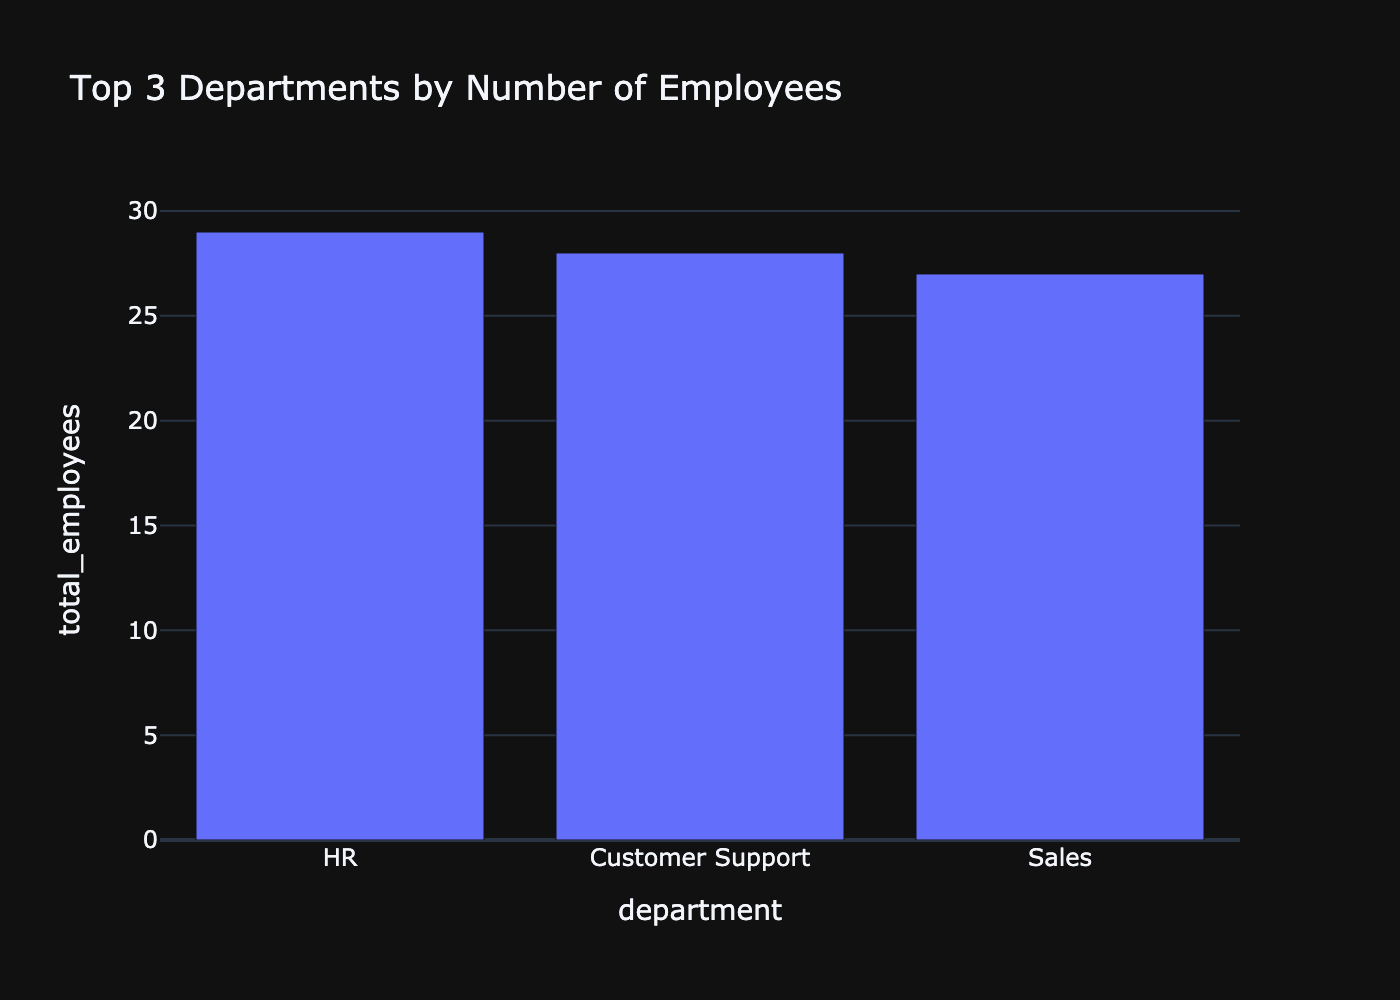

('SELECT department, COUNT(*) AS total_employees\nFROM colleague_data\nGROUP BY department\nORDER BY total_employees DESC\nLIMIT 3;',
          department  total_employees
 0                HR               29
 1  Customer Support               28
 2             Sales               27,
 None)

In [14]:
vn.ask('top 3 departments by number of employees')

SELECT cd.department, COUNT(ad.laptop_model) AS total_macbook_users
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model LIKE '%MacBook%'
GROUP BY cd.department
ORDER BY total_macbook_users DESC
LIMIT 5;
     department  total_macbook_users
0            HR                   10
1  Procurements                    9
2    Operations                    8
3         Sales                    8
4            IT                    7


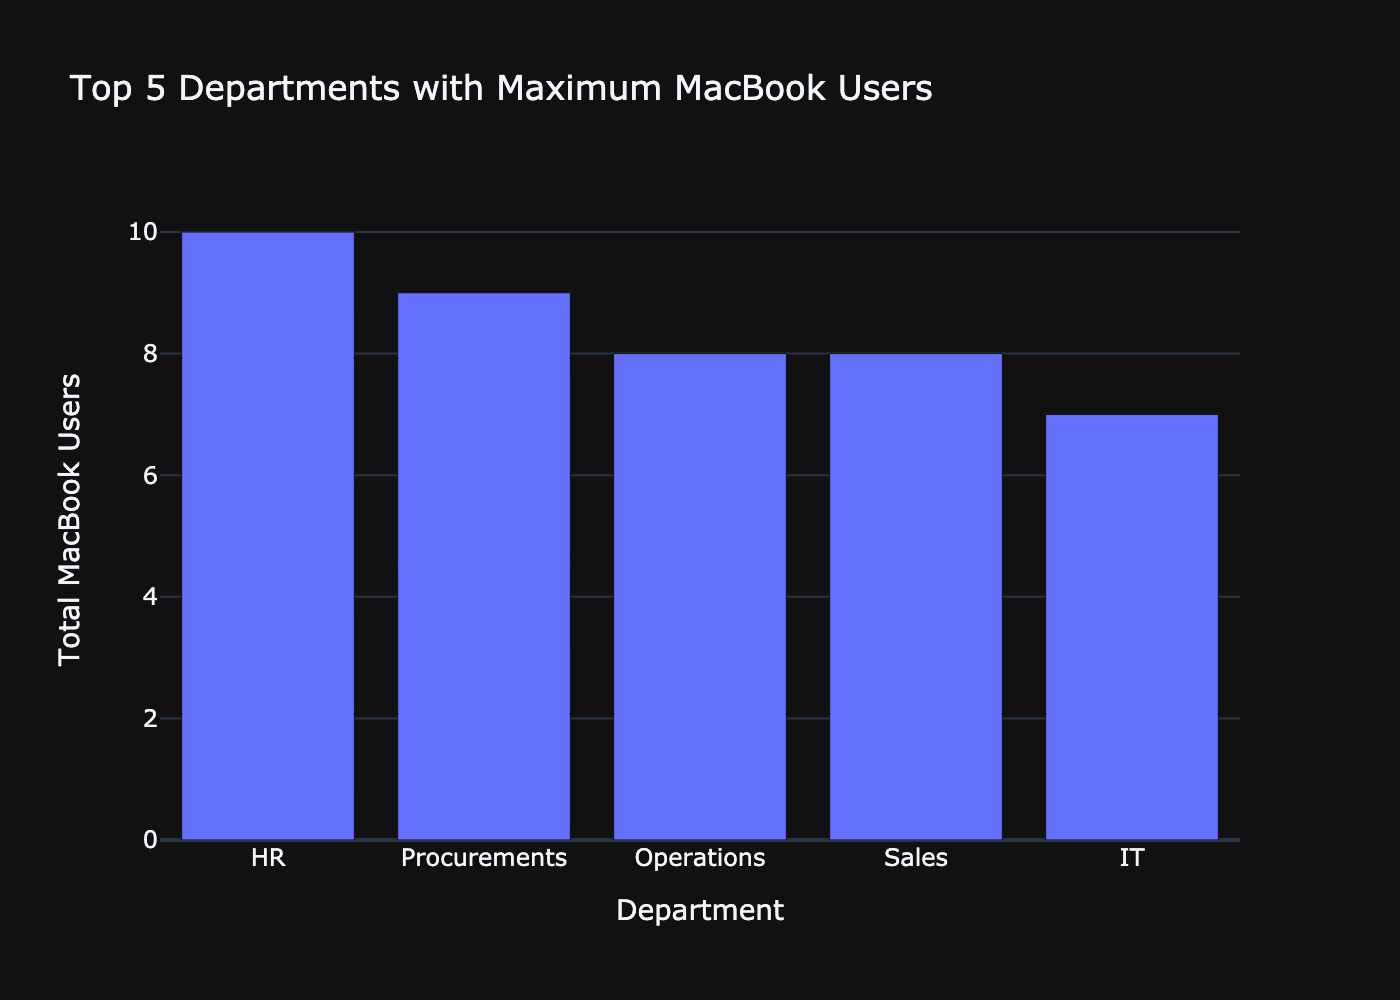

("SELECT cd.department, COUNT(ad.laptop_model) AS total_macbook_users\nFROM colleague_data cd\nJOIN asset_data ad \nON cd.employee_id = ad.employee_id\nWHERE ad.laptop_model LIKE '%MacBook%'\nGROUP BY cd.department\nORDER BY total_macbook_users DESC\nLIMIT 5;",
      department  total_macbook_users
 0            HR                   10
 1  Procurements                    9
 2    Operations                    8
 3         Sales                    8
 4            IT                    7,
 None)

In [15]:
vn.ask('what are the top 5 departments with maximum macbook users')

In [16]:
colleague_data

,employee_id,emp_name,work_location,work_country,business_unit,department,designation,band,role,date_of_joining,year_of_joining,joining_month
0,1001,John Doe,Building 3,France,BU5,Procurements,Senior Manager,A55,Business Analyst,2020-07-04,2020,July
1,1002,Jane Doe,Building 8,France,BU3,Sales,Lead Developer,A35,UI Developer,2015-10-21,2015,October
2,1003,John Smith,Building 5,Germany,BU2,Finance,Vice President,A55,UI Developer,2015-08-15,2015,August
3,1004,Jane Smith,Building 6,Kenya,BU1,Customer Support,Manager,A50,Project Manager,2023-06-01,2023,June
4,1005,John Johnson,Building 1,Nigeria,BU1,Operations,Director,A30,Python Developer,2018-06-19,2018,June
...,...,...,...,...,...,...,...,...,...,...,...,...
215,1216,Jane Hamilton,Building 9,Canada,BU3,Marketing,Senior Developer,A30,Data Scientist,2018-05-28,2018,May
216,1217,John Graham,Building 8,Brazil,BU6,IT,Vice President,A35,Data Scientist,2021-05-16,2021,May
217,1218,Jane Graham,Building 3,Kenya,BU1,HR,Manager,A50,Data Engineer,2023-12-22,2023,December
218,1219,John Kim,Building 1,USA,BU3,Sales,Senior Developer,A50,Project Manager,2015-06-30,2015,June


SELECT AVG(work_hours) AS average_working_hours
FROM office_login_data
WHERE employee_id = (
    SELECT employee_id
    FROM colleague_data
    WHERE emp_name = 'John Doe'
);
  average_working_hours
0    8.0000000000000000


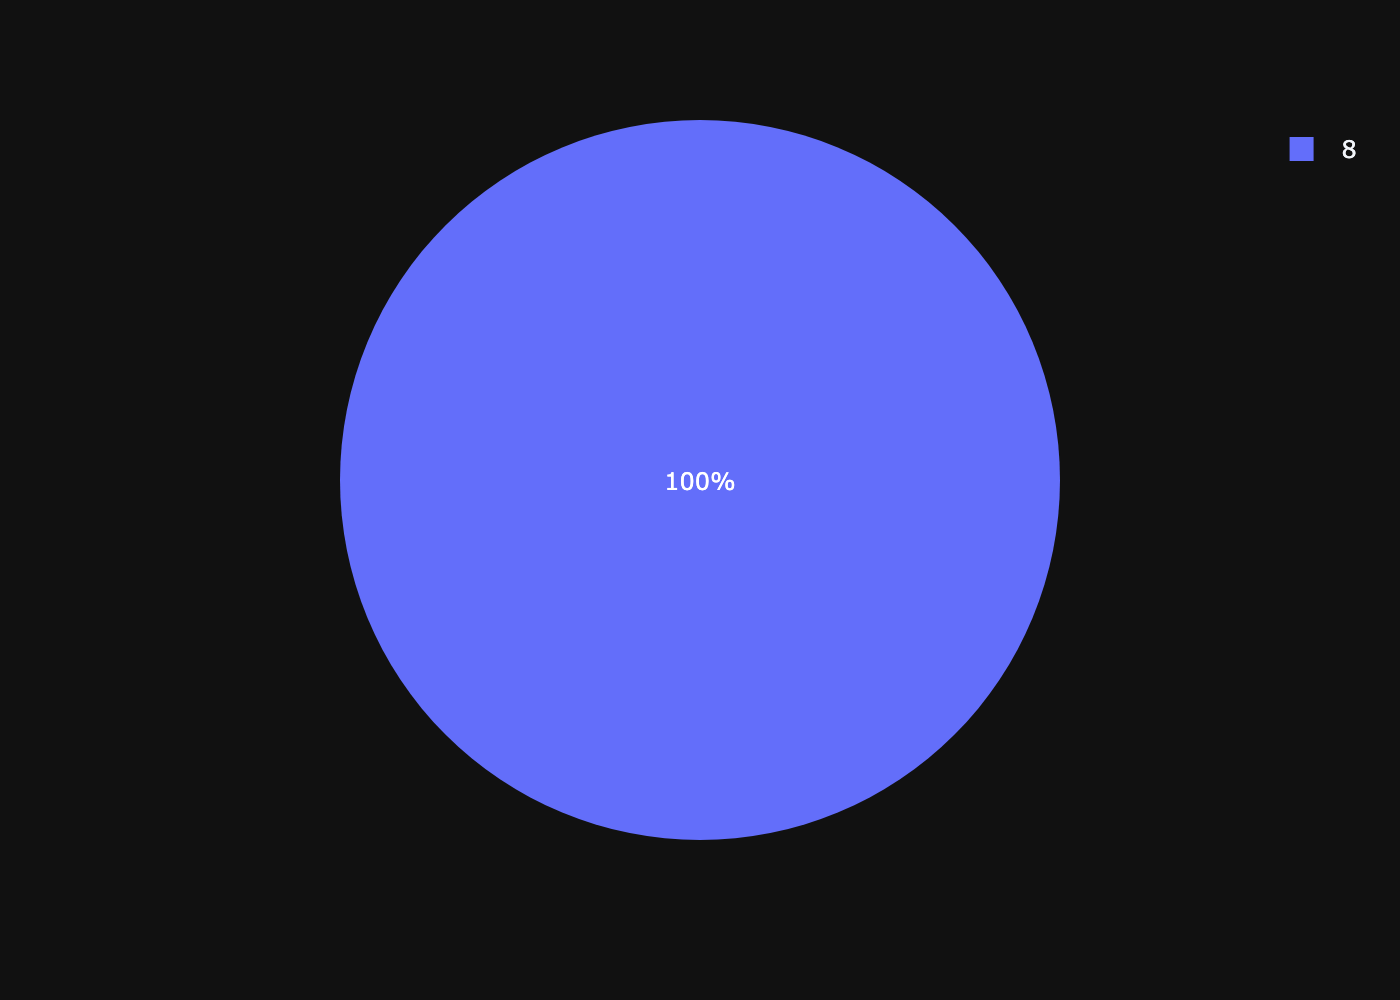

("SELECT AVG(work_hours) AS average_working_hours\nFROM office_login_data\nWHERE employee_id = (\n    SELECT employee_id\n    FROM colleague_data\n    WHERE emp_name = 'John Doe'\n);",
   average_working_hours
 0    8.0000000000000000,
 None)

In [17]:
vn.ask('what is the average working hours in office for John Doe?')

SELECT cd.department, AVG(ol.work_hours) AS average_work_hours
FROM colleague_data cd
JOIN office_login_data ol 
ON cd.employee_id = ol.employee_id
GROUP BY cd.department
HAVING AVG(ol.work_hours) < 6;
         department  average_work_hours
0             Sales  5.7407407407407407
1                IT  5.4400000000000000
2        Technology  5.7600000000000000
3  Customer Support  5.9285714285714286
4      Procurements  5.9473684210526316


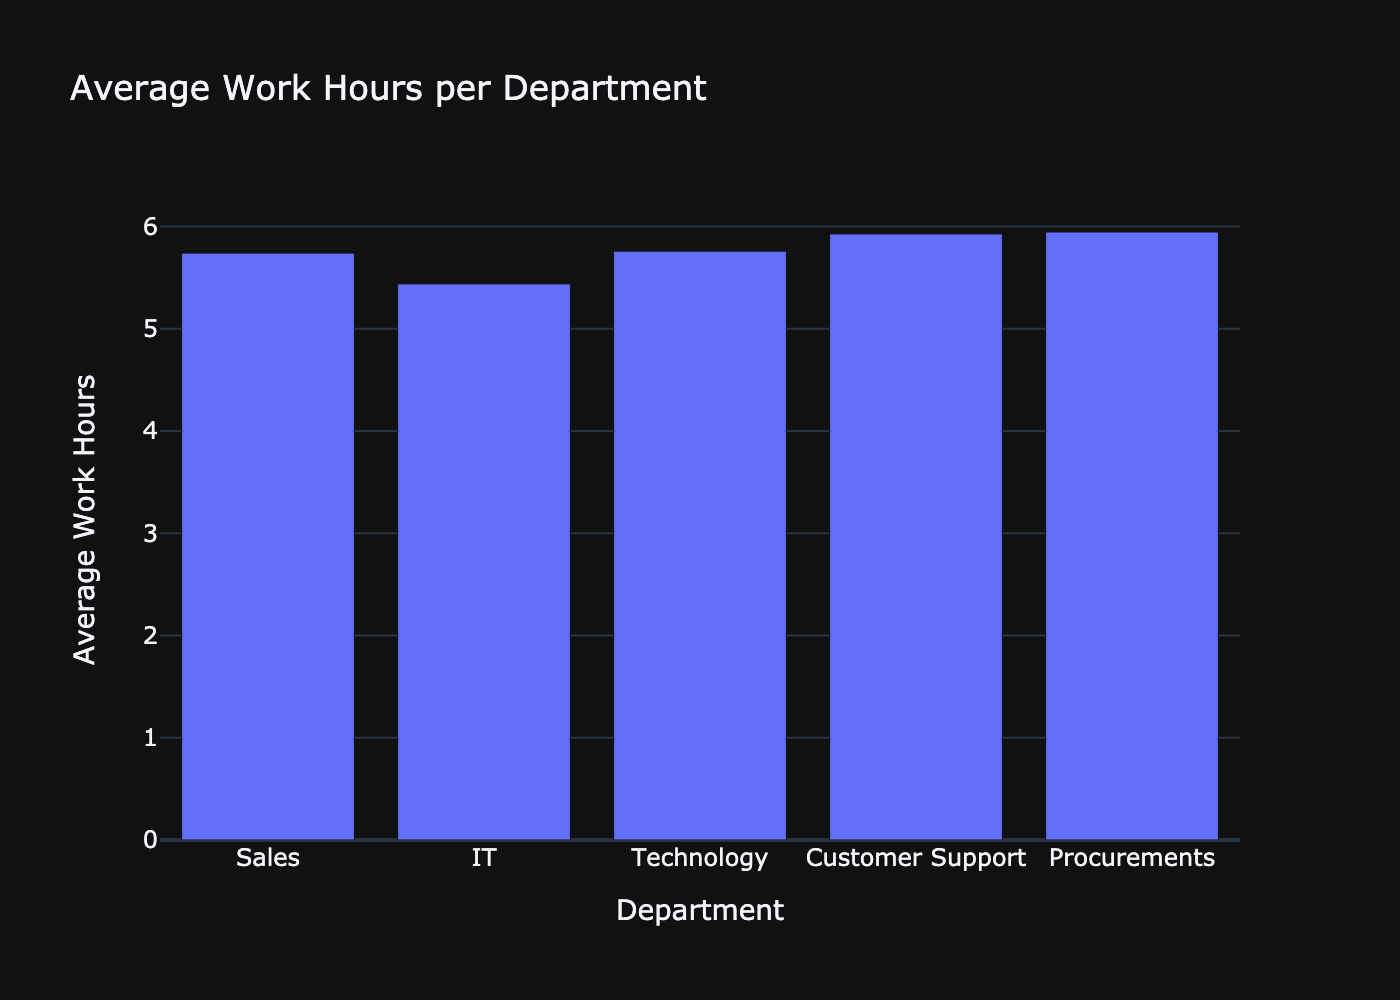

('SELECT cd.department, AVG(ol.work_hours) AS average_work_hours\nFROM colleague_data cd\nJOIN office_login_data ol \nON cd.employee_id = ol.employee_id\nGROUP BY cd.department\nHAVING AVG(ol.work_hours) < 6;',
          department  average_work_hours
 0             Sales  5.7407407407407407
 1                IT  5.4400000000000000
 2        Technology  5.7600000000000000
 3  Customer Support  5.9285714285714286
 4      Procurements  5.9473684210526316,
 None)

In [18]:
vn.ask('employees of which departments are wokring less than 6 hours on an average')

SELECT COUNT(*) AS total_colleagues
FROM colleague_data cd
JOIN asset_data ad
ON cd.employee_id = ad.employee_id
WHERE cd.work_country = 'India'
AND ad.laptop_model = 'MacBook Pro M2';
   total_colleagues
0                 0


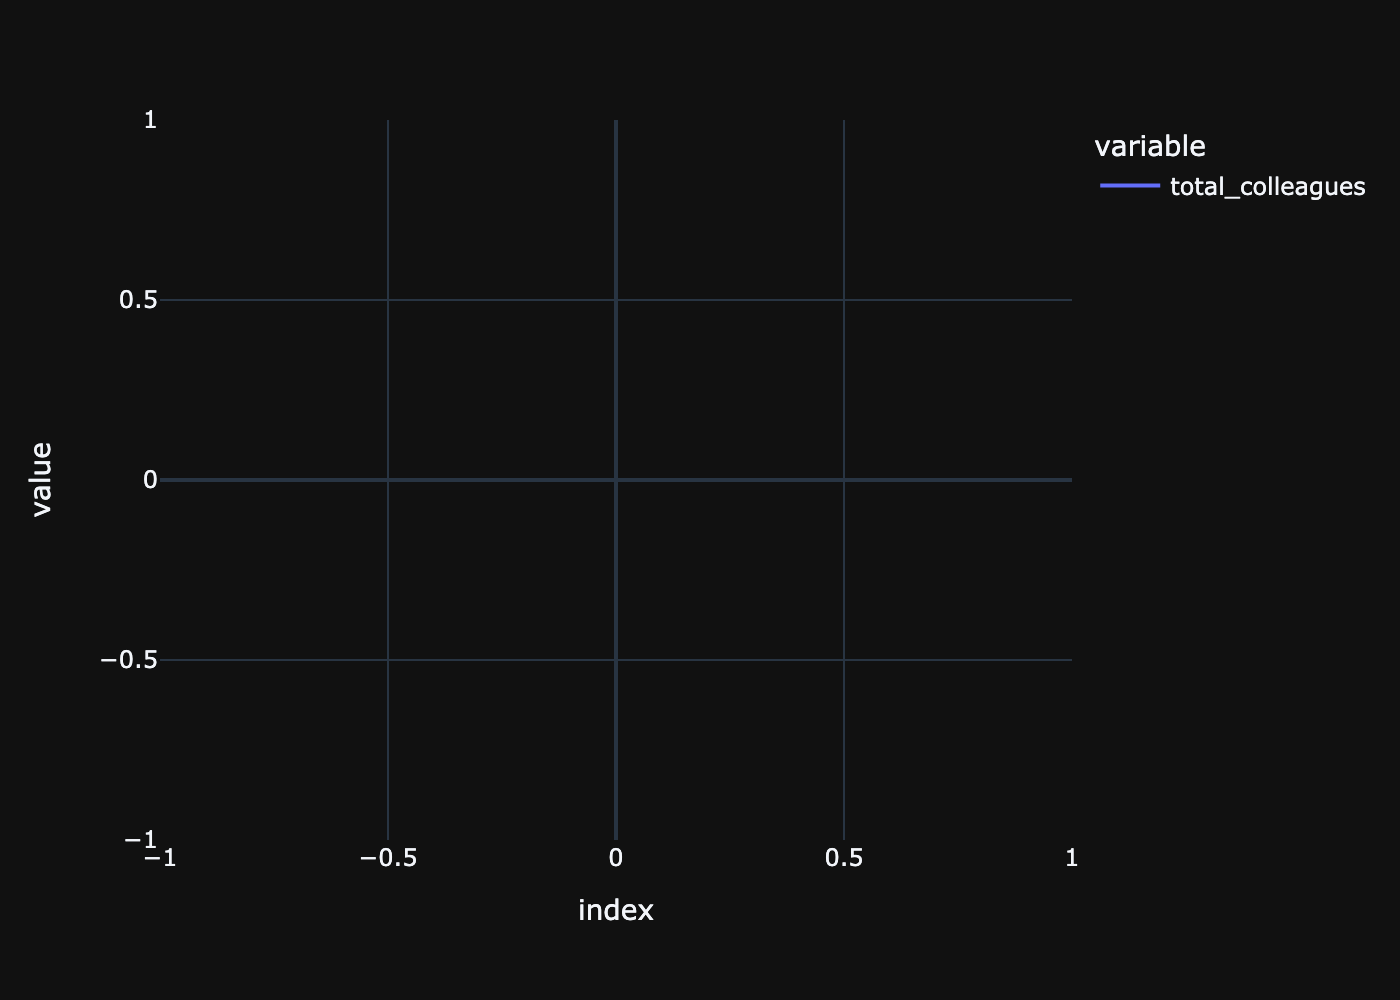

("SELECT COUNT(*) AS total_colleagues\nFROM colleague_data cd\nJOIN asset_data ad\nON cd.employee_id = ad.employee_id\nWHERE cd.work_country = 'India'\nAND ad.laptop_model = 'MacBook Pro M2';",
    total_colleagues
 0                 0,
 None)

In [13]:
vn.ask('how many colleagues are using macbook pro m2 laptops in india')

In [12]:
vn.ask("give me the details of the employees from india using macbook air m2")

SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE cd.work_country = 'India' 
AND ad.laptop_model = 'MacBook Air M2';
   employee_id     emp_name work_location work_country business_unit  \
0         1029  John Thomas   Building 10        India           BU5   

  department designation band              role date_of_joining  \
0         IT   Developer  A35  Business Analyst      2017-07-15   

   year_of_joining joining_month  employee_id    laptop_model manufacturer  
0             2017          July         1029  MacBook Air M2        Apple  
Couldn't run plotly code:  The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


Traceback (most recent call last):
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/vanna/base/base.py", line 1414, in get_plotly_figure
    exec(plotly_code, globals(), ldict)
  File "<string>", line 4, in <module>
AttributeError: module 'plotly.express' has no attribute 'indicators'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/vanna/base/base.py", line 1084, in ask
    fig = self.get_plotly_figure(plotly_code=plotly_code, df=df)
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/vanna/base/base.py", line 1427, in get_plotly_figure
    fig = px.scatter(df, x=numeric_cols[0], y=numeric_cols[1])
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/plotly/express/_chart_types.py", line 66, in scatter
    return ma

In [11]:
vn.ask("give me the details of the employees from india using macbook air m2 and working in technology")

SELECT *
FROM colleague_data cd
JOIN asset_data ad 
ON cd.employee_id = ad.employee_id
WHERE ad.laptop_model = 'MacBook Air M2'
AND cd.work_country = 'India'
AND cd.department = 'Technology';
Empty DataFrame
Columns: [employee_id, emp_name, work_location, work_country, business_unit, department, designation, band, role, date_of_joining, year_of_joining, joining_month, employee_id, laptop_model, manufacturer]
Index: []
Couldn't run plotly code:  The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


Traceback (most recent call last):
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/vanna/base/base.py", line 1414, in get_plotly_figure
    exec(plotly_code, globals(), ldict)
  File "<string>", line 6, in <module>
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/plotly/express/_chart_types.py", line 373, in bar
    return make_figure(
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/plotly/express/_core.py", line 2076, in make_figure
    args = build_dataframe(args, constructor)
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/plotly/express/_core.py", line 1485, in build_dataframe
    df_output, wide_id_vars = process_args_into_dataframe(
  File "/Users/ishadave/Documents/Priyesh/Softwares/inc_grp_venv/lib/python3.9/site-packages/plotly/express/_core.py", line 1225, in process_args_into_dataframe
    df_output

# Flask API

In [20]:
from vanna.flask import VannaFlaskApp

In [21]:
app = VannaFlaskApp(vn, allow_llm_to_see_data=True)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
